In [1]:
import numpy as np
import pandas as pd

# for Scaling , Encoding and Polinomial features for Hidden paterns:
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder , PolynomialFeatures 
from sklearn.feature_selection import SelectKBest , f_classif # for classification

# for Imputing na :
from sklearn.impute import SimpleImputer

# Under sampleling for imbalanced data set:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#For Dimentionality Reduction and as model:
from sklearn.decomposition import PCA

# test case split and Cross validation for right hyper parmeter
from sklearn.model_selection import train_test_split , GridSearchCV

#----------------------------------------------------------------------------------

#MODELS:

# 1) For classificstion type and out target is Binary , Hence we Try with Logistic Regression First:
from sklearn.linear_model import LogisticRegression

# 2) Random Forest for Classification Tasks , Bagging methord may perform well:
from sklearn.ensemble import RandomForestClassifier

# 3) by using simple KNN approch:
from sklearn.neighbors import KNeighborsClassifier

# 4) probability based approch:
from sklearn.naive_bayes import GaussianNB

# 5) Boosing for bagging with continous improvement:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# 6) at last we also trying Voting and Stacking for improvement in Model:
from sklearn.ensemble import VotingClassifier , StackingClassifier

#----------------------------------------------------------------------------------

# Metrics to calculate Classification type traget:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , f1_score

#----------------------------------------------------------------------------------

# for Pipeline Creationa and transformimg.
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#----------------------------------------------------------------------------------

# For chart and visuals.
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
test_data = pd.read_csv("test.csv")

In [5]:
test_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [6]:
sample_sub = pd.read_csv("sample_submission_iA3afxn.csv")

In [7]:
sample_sub.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [8]:
train_data_raw = train_data.copy() 
# ---- Making a copy for future analysis , sometimes Tree models perform well with numerical and categorical inputs.

#### EDA :

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


###### ------->  no null values in both Train and Test data

In [11]:
train_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [12]:
train_data.shape

(381109, 12)

In [13]:
test_data.shape

(127037, 11)

In [14]:
train_data.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [15]:
train_data.duplicated().sum()  # No Dupicates

0

In [16]:
train_data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [17]:
train_data['Response'].value_counts(normalize=True)

Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64

In [18]:
train_data['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

###### ----> we have data imbalance issue

In [19]:
train_data['Region_Code'].value_counts()

Region_Code
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: count, dtype: int64

In [20]:
num_col = train_data.select_dtypes(include= 'number').columns
num_col

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [21]:
cate_col = train_data.select_dtypes(exclude= 'number').columns
cate_col

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

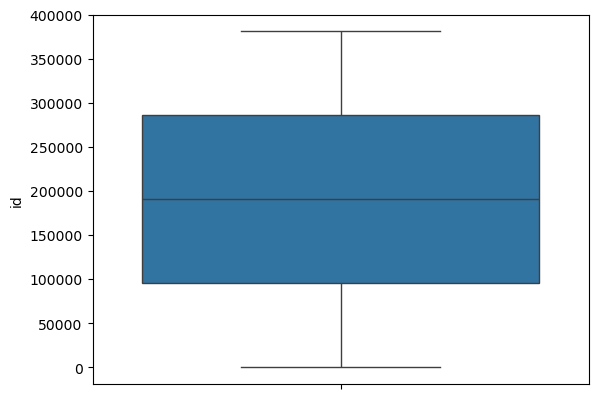

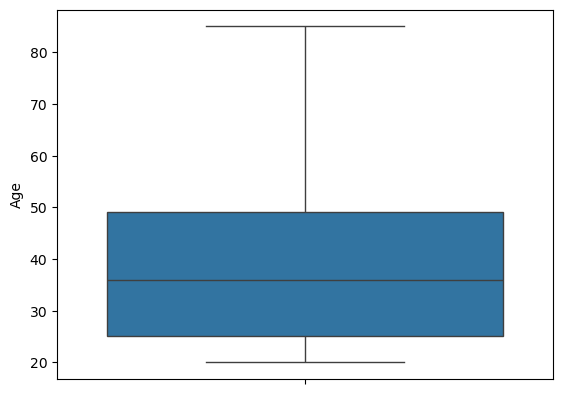

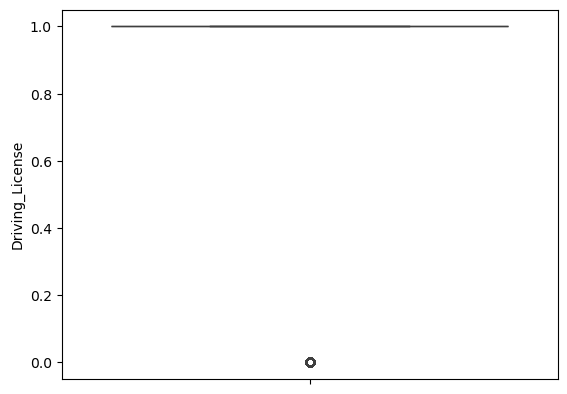

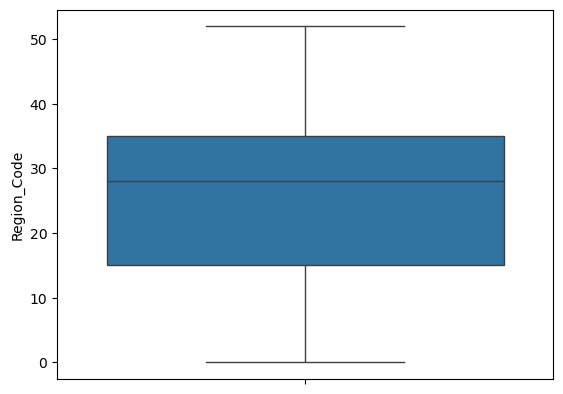

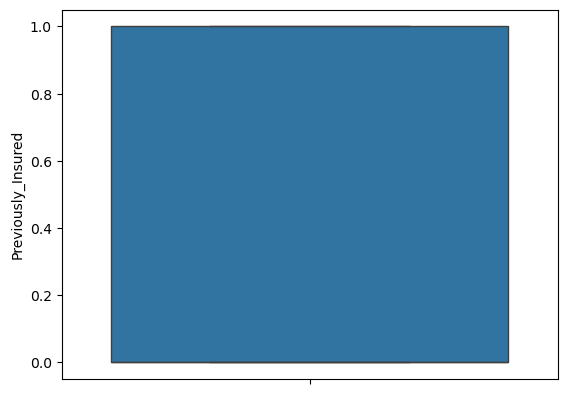

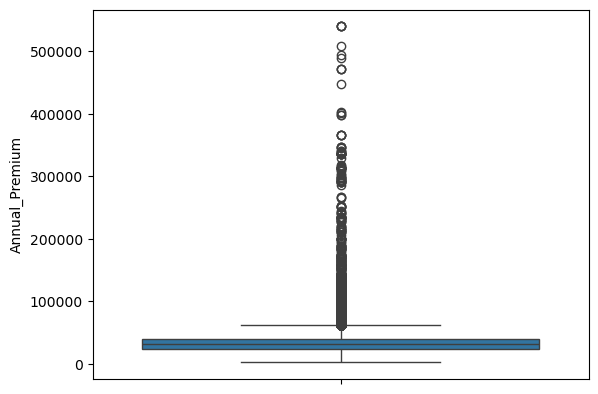

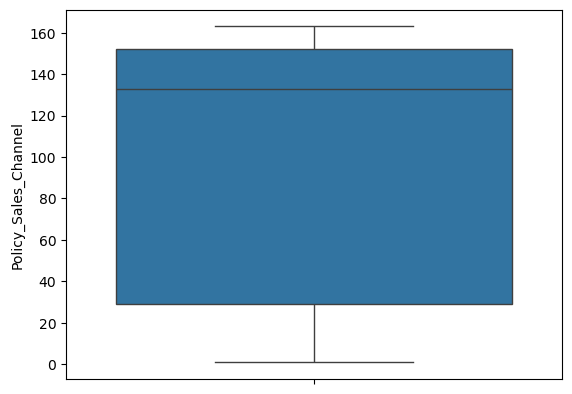

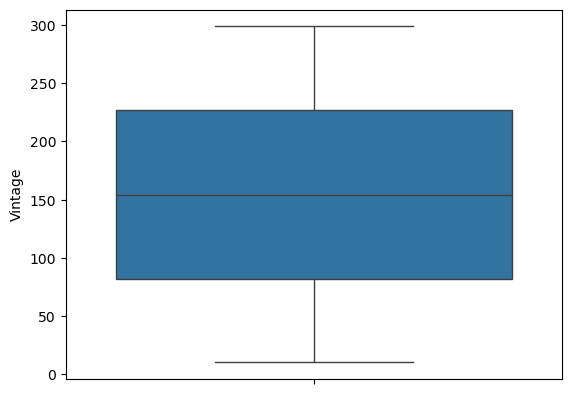

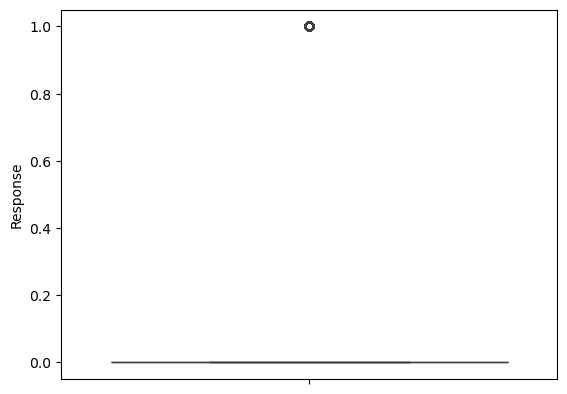

In [22]:
for i in num_col:
    sns.boxplot(train_data[i])
    plt.show()

<Axes: ylabel='Annual_Premium'>

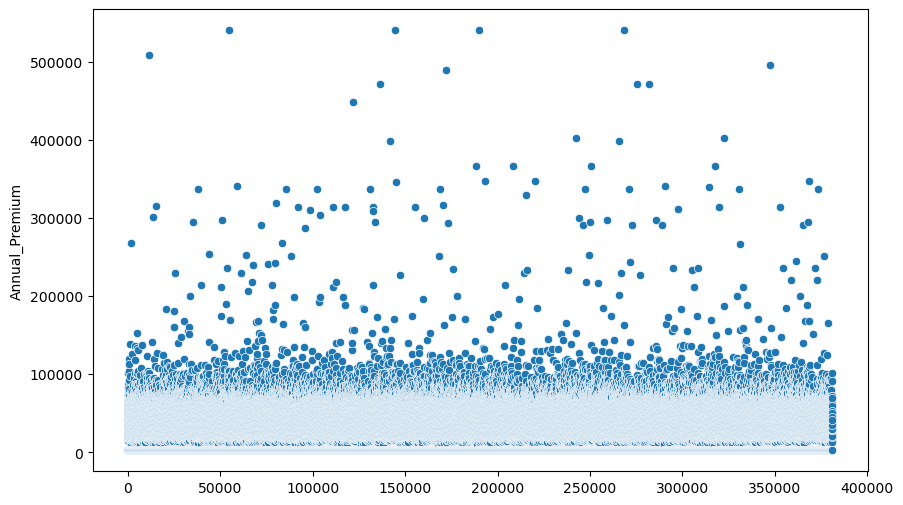

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(train_data)), y=train_data['Annual_Premium'])

In [24]:
train_data[train_data['Annual_Premium'] >150000].count()

id                      191
Gender                  191
Age                     191
Driving_License         191
Region_Code             191
Previously_Insured      191
Vehicle_Age             191
Vehicle_Damage          191
Annual_Premium          191
Policy_Sales_Channel    191
Vintage                 191
Response                191
dtype: int64

In [25]:
train_data[train_data['Annual_Premium'] <150000].count()

id                      380918
Gender                  380918
Age                     380918
Driving_License         380918
Region_Code             380918
Previously_Insured      380918
Vehicle_Age             380918
Vehicle_Damage          380918
Annual_Premium          380918
Policy_Sales_Channel    380918
Vintage                 380918
Response                380918
dtype: int64

In [26]:
###### -- > we have outliers after range of 150000

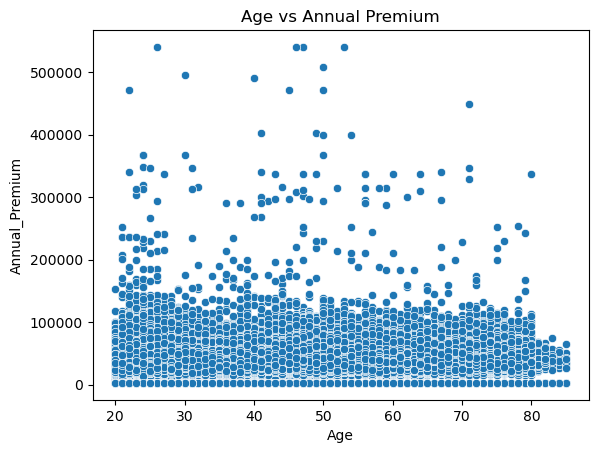

In [27]:
sns.scatterplot(x=train_data['Age'], y=train_data['Annual_Premium'])
plt.title("Age vs Annual Premium")
plt.show()

In [28]:
#sns.pairplot(train_data)

<Axes: >

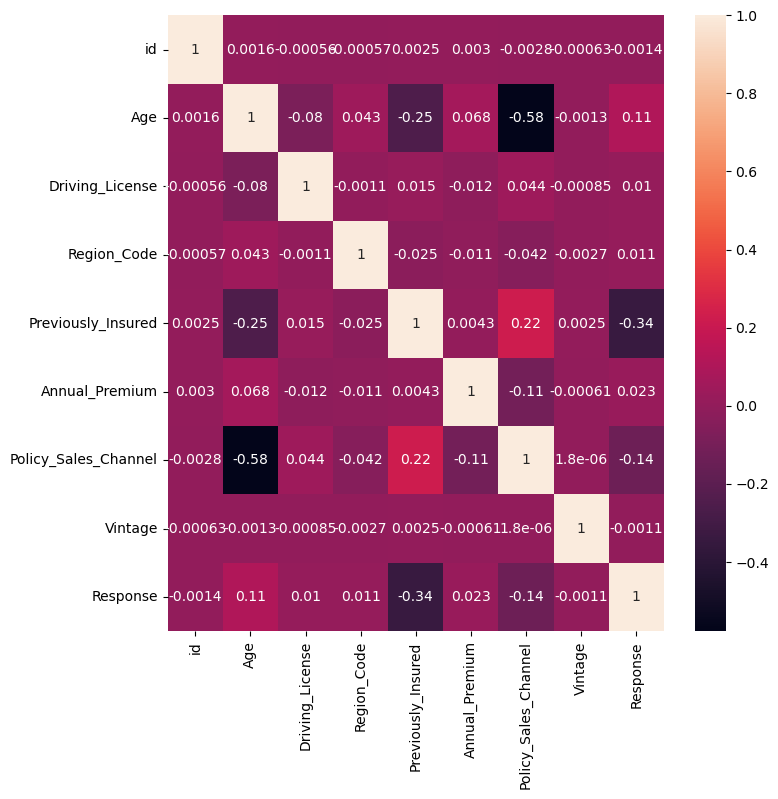

In [29]:
plt.figure(figsize=(8, 8))
sns.heatmap(train_data[num_col].corr(), annot=True)

In [30]:
print((train_data.groupby(['Gender','Response'])['Response']).size())

Gender  Response
Female  0           156835
        1            18185
Male    0           177564
        1            28525
Name: Response, dtype: int64


### Preprocessing

#### ----> Under Sampeling

In [31]:
# Before that we need to remove the outlier

In [32]:
train_data = train_data[train_data['Annual_Premium'] <150000]

In [33]:
train_data['Response'].value_counts()

Response
0    334241
1     46677
Name: count, dtype: int64

In [34]:
x = train_data.drop(columns='Response')
y = train_data['Response']

In [35]:
x.shape , y.shape

((380918, 11), (380918,))

In [36]:
under_sampeling = RandomUnderSampler()
x_us , y_us = under_sampeling.fit_resample(x , y)

In [37]:
x_us.shape , y_us.shape

((93354, 11), (93354,))

In [38]:
y_us.value_counts()

Response
0    46677
1    46677
Name: count, dtype: int64

In [39]:
train_us = pd.concat([x_us , y_us],axis=1)

In [40]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [41]:
train_us.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
326652,326653,Female,25,1,28.0,1,< 1 Year,No,47119.0,152.0,281,0
370243,370244,Male,52,1,22.0,0,1-2 Year,Yes,29348.0,152.0,202,0
342973,342974,Female,26,1,33.0,1,< 1 Year,No,29629.0,152.0,119,0
177278,177279,Female,20,1,10.0,1,< 1 Year,No,2630.0,160.0,15,0
94109,94110,Male,25,1,3.0,0,< 1 Year,Yes,34374.0,152.0,86,0


#### -------> we completed under sampeling , combine the train and test data to do preprocessing to capture the column chages.

In [42]:
data = pd.concat([train_us,test_data])

In [43]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
326652,326653,Female,25,1,28.0,1,< 1 Year,No,47119.0,152.0,281,0.0
370243,370244,Male,52,1,22.0,0,1-2 Year,Yes,29348.0,152.0,202,0.0
342973,342974,Female,26,1,33.0,1,< 1 Year,No,29629.0,152.0,119,0.0
177278,177279,Female,20,1,10.0,1,< 1 Year,No,2630.0,160.0,15,0.0
94109,94110,Male,25,1,3.0,0,< 1 Year,Yes,34374.0,152.0,86,0.0


In [44]:
data.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,NaN
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,NaN
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,NaN
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,NaN
127036,508146,Male,41,1,29.0,1,1-2 Year,No,27927.0,124.0,231,NaN


In [45]:
print(train_data['Gender'].unique())

['Male' 'Female']


In [46]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})
data['Vehicle_Damage'] = data['Vehicle_Damage'].map({'No': 0, 'Yes': 1})
data['Vehicle_Age'] = data['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1 , '> 2 Years':3})


In [47]:
bins = [0, 10, 20, 30, 40, 52]
labels = ['1-10', '11-20', '21-30', '31-40', '41-52']
data['Region_group'] = pd.cut(data['Region_Code'], bins=bins, labels=labels) 
data = data.drop(columns='Region_Code')


In [48]:
encoded_data = pd.get_dummies(data,columns = ['Region_group'],drop_first =  True)

In [49]:
prepr_train = encoded_data[encoded_data['Response'].notna()]
prepr_test = encoded_data[encoded_data['Response'].isna()]

In [50]:
encoded_data.head()

,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Region_group_11-20,Region_group_21-30,Region_group_31-40,Region_group_41-52
326652,326653,0,25,1,1,0,0,47119.0,152.0,281,0.0,False,True,False,False
370243,370244,1,52,1,0,1,1,29348.0,152.0,202,0.0,False,True,False,False
342973,342974,0,26,1,1,0,0,29629.0,152.0,119,0.0,False,False,True,False
177278,177279,0,20,1,1,0,0,2630.0,160.0,15,0.0,False,False,False,False
94109,94110,1,25,1,0,0,1,34374.0,152.0,86,0.0,False,False,False,False


In [51]:
prepr_train.head()

,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Region_group_11-20,Region_group_21-30,Region_group_31-40,Region_group_41-52
326652,326653,0,25,1,1,0,0,47119.0,152.0,281,0.0,False,True,False,False
370243,370244,1,52,1,0,1,1,29348.0,152.0,202,0.0,False,True,False,False
342973,342974,0,26,1,1,0,0,29629.0,152.0,119,0.0,False,False,True,False
177278,177279,0,20,1,1,0,0,2630.0,160.0,15,0.0,False,False,False,False
94109,94110,1,25,1,0,0,1,34374.0,152.0,86,0.0,False,False,False,False


In [52]:
prepr_test.head()

,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Region_group_11-20,Region_group_21-30,Region_group_31-40,Region_group_41-52
0,381110,1,25,1,1,0,0,35786.0,152.0,53,NaN,True,False,False,False
1,381111,1,40,1,0,1,1,33762.0,7.0,111,NaN,False,True,False,False
2,381112,1,47,1,0,1,1,40050.0,124.0,199,NaN,False,True,False,False
3,381113,1,24,1,1,0,1,37356.0,152.0,187,NaN,False,True,False,False
4,381114,1,27,1,1,0,0,59097.0,152.0,297,NaN,False,True,False,False


In [53]:
prepr_test = prepr_test.drop(columns='Response')

### Pipeline Building

In [68]:
def results(x_train , x_test , y_train , y_test , model):
    model.fit(x_train,y_train)
    train_predict = model.predict(x_train)
    test_predict = model.predict(x_test)
    print('Train F1_score:',f1_score(y_train , train_predict))
    print('Test F1_score:',f1_score(y_test , test_predict))
    print('Train Accuracy_score:\n',accuracy_score(y_train , train_predict))
    print('Test Accuracy_score:\n',accuracy_score(y_test , test_predict))
    print('Train confusion_matrix:\n',confusion_matrix(y_train , train_predict))
    print('Test confusion_matrix:\n',confusion_matrix(y_test , test_predict))
    print('Train Classification_Report:\n',classification_report(y_train , train_predict))
    print('Test Classification_Report:\n',classification_report(y_test , test_predict))

In [83]:
x = prepr_train.drop(columns=['Response','id'])
y = prepr_train['Response']

In [91]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.3 , random_state= 42)

In [92]:
num_var = ['Age' , 'Annual_Premium' , 'Policy_Sales_Channel' , 'Vintage']

In [93]:
numerical_attribute = Pipeline( steps= [
    ('Scaling',MinMaxScaler())
])

In [94]:
PreProcessing = ColumnTransformer( transformers= [
    ('numerical_data',numerical_attribute,num_var)   
])

#### 1) linear regresion

In [95]:
model_1 = Pipeline( steps=[
    ('Preprocessing',PreProcessing),
    ('Linear Regression',LogisticRegression())
])

In [97]:
results(x_train , x_test , y_train , y_test , model_1)

Train F1_score: 0.5485699308718016
Test F1_score: 0.5480603860118479
Train Accuracy_score:
 0.5782820940517545
Test Accuracy_score:
 0.5777841253972221
Train confusion_matrix:
 [[21045 11599]
 [15959 16744]]
Test confusion_matrix:
 [[9012 5021]
 [6804 7170]]
Train Classification_Report:
               precision    recall  f1-score   support

         0.0       0.57      0.64      0.60     32644
         1.0       0.59      0.51      0.55     32703

    accuracy                           0.58     65347
   macro avg       0.58      0.58      0.58     65347
weighted avg       0.58      0.58      0.58     65347

Test Classification_Report:
               precision    recall  f1-score   support

         0.0       0.57      0.64      0.60     14033
         1.0       0.59      0.51      0.55     13974

    accuracy                           0.58     28007
   macro avg       0.58      0.58      0.58     28007
weighted avg       0.58      0.58      0.58     28007



In [124]:
model_1_1 = Pipeline( steps=[
    ('Preprocessing',PreProcessing),
    ('polyfeature',PolynomialFeatures(degree=2)),
    ('K Best', SelectKBest(f_classif , k= 15)),
    ('Linear Regression',LogisticRegression())
])

In [125]:
results(x_train , x_test , y_train , y_test , model_1_1)

Train F1_score: 0.689063778172689
Test F1_score: 0.6884385861367959
Train Accuracy_score:
 0.6626317964099346
Test Accuracy_score:
 0.6607276752240512
Train confusion_matrix:
 [[18873 13771]
 [ 8275 24428]]
Test confusion_matrix:
 [[ 8007  6026]
 [ 3476 10498]]
Train Classification_Report:
               precision    recall  f1-score   support

         0.0       0.70      0.58      0.63     32644
         1.0       0.64      0.75      0.69     32703

    accuracy                           0.66     65347
   macro avg       0.67      0.66      0.66     65347
weighted avg       0.67      0.66      0.66     65347

Test Classification_Report:
               precision    recall  f1-score   support

         0.0       0.70      0.57      0.63     14033
         1.0       0.64      0.75      0.69     13974

    accuracy                           0.66     28007
   macro avg       0.67      0.66      0.66     28007
weighted avg       0.67      0.66      0.66     28007



## 2) Random Forest

In [149]:
model_2 = Pipeline( steps=[
    ('Preprocessing',PreProcessing),
    ('RF',RandomForestClassifier(max_depth=5 , min_samples_leaf= 5 , min_samples_split= 5))
])

In [150]:
results(x_train , x_test , y_train , y_test , model_2)

Train F1_score: 0.7355184889093643
Test F1_score: 0.7332053742802304
Train Accuracy_score:
 0.7013022786049857
Test Accuracy_score:
 0.6972542578641054
Train confusion_matrix:
 [[18687 13957]
 [ 5562 27141]]
Test confusion_matrix:
 [[ 7877  6156]
 [ 2323 11651]]
Train Classification_Report:
               precision    recall  f1-score   support

         0.0       0.77      0.57      0.66     32644
         1.0       0.66      0.83      0.74     32703

    accuracy                           0.70     65347
   macro avg       0.72      0.70      0.70     65347
weighted avg       0.72      0.70      0.70     65347

Test Classification_Report:
               precision    recall  f1-score   support

         0.0       0.77      0.56      0.65     14033
         1.0       0.65      0.83      0.73     13974

    accuracy                           0.70     28007
   macro avg       0.71      0.70      0.69     28007
weighted avg       0.71      0.70      0.69     28007



In [170]:
y_pre = model_2.predict(prepr_test)

In [172]:
sample_sub['Response']=y_pre
sample_sub['Response']=sample_sub['Response'].astype(int)
sample_sub.to_csv('Sub_RF_scaled_encoded.csv',index=False)

In [140]:
param_grid = {
    'RF__n_estimators': [50,100],
    'RF__max_depth': [5, 10, 15],
    'RF__min_samples_split': [2, 3,5],
    'RF__min_samples_leaf': [1, 2, 4],
}

In [141]:
grid = GridSearchCV(model_2, param_grid, cv=5, scoring='f1', n_jobs=-1 , verbose= 2)

In [142]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessing',
                                        ColumnTransformer(transformers=[('numerical_data',
                                                                         Pipeline(steps=[('Scaling',
                                                                                          MinMaxScaler())]),
                                                                         ['Age',
                                                                          'Annual_Premium',
                                                                          'Policy_Sales_Channel',
                                                                          'Vintage'])])),
                                       ('RF',
                                        RandomForestClassifier(max_depth=5,
                                                               min_samples_leaf=5,
                                                               min_samples_split=5))]),
             n_jobs=-1,
             param_grid={'RF__max_depth': [5, 10, 15],
                         'RF__min_samples_leaf': [1, 2, 4],
                         'RF__min_samples_split': [2, 3, 5],
                         'RF__n_estimators': [50, 100]},
             scoring='f1', verbose=2)

In [221]:
model_2_1 = Pipeline( steps=[
    ('Preprocessing',PreProcessing),
    ('RF',RandomForestClassifier(max_depth=100, min_samples_leaf=100, min_samples_split=100))
])

In [222]:
results(x_train , x_test , y_train , y_test , model_2_1)

Train F1_score: 0.7379545734925226
Test F1_score: 0.7323862912472926
Train Accuracy_score:
 0.7074540529787137
Test Accuracy_score:
 0.7000035705359374
Train confusion_matrix:
 [[19312 13332]
 [ 5785 26918]]
Test confusion_matrix:
 [[ 8108  5925]
 [ 2477 11497]]
Train Classification_Report:
               precision    recall  f1-score   support

         0.0       0.77      0.59      0.67     32644
         1.0       0.67      0.82      0.74     32703

    accuracy                           0.71     65347
   macro avg       0.72      0.71      0.70     65347
weighted avg       0.72      0.71      0.70     65347

Test Classification_Report:
               precision    recall  f1-score   support

         0.0       0.77      0.58      0.66     14033
         1.0       0.66      0.82      0.73     13974

    accuracy                           0.70     28007
   macro avg       0.71      0.70      0.70     28007
weighted avg       0.71      0.70      0.70     28007



#### 3 KNN

In [179]:
model_3 = Pipeline( steps=[
    ('Preprocessing',PreProcessing),
    ('Knn',KNeighborsClassifier())
])

In [180]:
results(x_train , x_test , y_train , y_test , model_3)

Train F1_score: 0.7600316592745248
Test F1_score: 0.6510329424902289
Train Accuracy_score:
 0.7540973571854868
Test Accuracy_score:
 0.642946406255579
Train confusion_matrix:
 [[23831  8813]
 [ 7256 25447]]
Test confusion_matrix:
 [[8679 5354]
 [4646 9328]]
Train Classification_Report:
               precision    recall  f1-score   support

         0.0       0.77      0.73      0.75     32644
         1.0       0.74      0.78      0.76     32703

    accuracy                           0.75     65347
   macro avg       0.75      0.75      0.75     65347
weighted avg       0.75      0.75      0.75     65347

Test Classification_Report:
               precision    recall  f1-score   support

         0.0       0.65      0.62      0.63     14033
         1.0       0.64      0.67      0.65     13974

    accuracy                           0.64     28007
   macro avg       0.64      0.64      0.64     28007
weighted avg       0.64      0.64      0.64     28007



In [165]:
param_grid ={
    'Knn__n_neighbors': [4 ,5,6,7,8,9,10,11,12,13,14,15]
}

In [166]:
grid = GridSearchCV(model_3, param_grid, cv=5, scoring='f1', n_jobs=-1 , verbose= 2)

In [167]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessing',
                                        ColumnTransformer(transformers=[('numerical_data',
                                                                         Pipeline(steps=[('Scaling',
                                                                                          MinMaxScaler())]),
                                                                         ['Age',
                                                                          'Annual_Premium',
                                                                          'Policy_Sales_Channel',
                                                                          'Vintage'])])),
                                       ('Knn',
                                        KNeighborsClassifier(n_neighbors=4))]),
             n_jobs=-1,
             param_grid={'Knn__n_neighbors': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                              14, 15]},
             scoring='f1', verbose=2)

In [168]:
model_3_1 = Pipeline( steps=[
    ('Preprocessing',PreProcessing),
    ('Knn',KNeighborsClassifier(n_neighbors=15))
])

In [169]:
results(x_train , x_test , y_train , y_test , model_3_1)

Train F1_score: 0.7251172634709987
Test F1_score: 0.685920096044821
Train Accuracy_score:
 0.7058472462393071
Test Accuracy_score:
 0.6637269254115042
Train confusion_matrix:
 [[20772 11872]
 [ 7350 25353]]
Test confusion_matrix:
 [[ 8305  5728]
 [ 3690 10284]]
Train Classification_Report:
               precision    recall  f1-score   support

         0.0       0.74      0.64      0.68     32644
         1.0       0.68      0.78      0.73     32703

    accuracy                           0.71     65347
   macro avg       0.71      0.71      0.70     65347
weighted avg       0.71      0.71      0.70     65347

Test Classification_Report:
               precision    recall  f1-score   support

         0.0       0.69      0.59      0.64     14033
         1.0       0.64      0.74      0.69     13974

    accuracy                           0.66     28007
   macro avg       0.67      0.66      0.66     28007
weighted avg       0.67      0.66      0.66     28007



In [173]:
y_pre = model_3_1.predict(prepr_test)
sample_sub['Response']=y_pre
sample_sub['Response']=sample_sub['Response'].astype(int)
sample_sub.to_csv('Sub_KNN_scaled_encoded.csv',index=False)

#### 4 NAive Bayes

In [182]:
model_4 = Pipeline( steps=[
    ('Preprocessing',PreProcessing),
    ('Nb',GaussianNB())
])

In [183]:
results(x_train , x_test , y_train , y_test , model_4)

Train F1_score: 0.6103188048667796
Test F1_score: 0.6122668966260645
Train Accuracy_score:
 0.6128054845670038
Test Accuracy_score:
 0.6147034669903952
Train confusion_matrix:
 [[20231 12413]
 [12889 19814]]
Test confusion_matrix:
 [[8696 5337]
 [5454 8520]]
Train Classification_Report:
               precision    recall  f1-score   support

         0.0       0.61      0.62      0.62     32644
         1.0       0.61      0.61      0.61     32703

    accuracy                           0.61     65347
   macro avg       0.61      0.61      0.61     65347
weighted avg       0.61      0.61      0.61     65347

Test Classification_Report:
               precision    recall  f1-score   support

         0.0       0.61      0.62      0.62     14033
         1.0       0.61      0.61      0.61     13974

    accuracy                           0.61     28007
   macro avg       0.61      0.61      0.61     28007
weighted avg       0.61      0.61      0.61     28007



#### 5 Boosting

In [218]:
model_5 = Pipeline( steps=[
    ('Preprocessing',PreProcessing),
    ('ADboost',AdaBoostClassifier(estimator= DecisionTreeClassifier(min_samples_leaf=700 , min_samples_split= 800) , n_estimators= 80))
])

In [219]:
results(x_train , x_test , y_train , y_test , model_5)

Train F1_score: 0.7584897518878101
Test F1_score: 0.7013256561328334
Train Accuracy_score:
 0.7430486479869007
Test Accuracy_score:
 0.6814367836612275
Train confusion_matrix:
 [[22189 10455]
 [ 6336 26367]]
Test confusion_matrix:
 [[ 8610  5423]
 [ 3499 10475]]
Train Classification_Report:
               precision    recall  f1-score   support

         0.0       0.78      0.68      0.73     32644
         1.0       0.72      0.81      0.76     32703

    accuracy                           0.74     65347
   macro avg       0.75      0.74      0.74     65347
weighted avg       0.75      0.74      0.74     65347

Test Classification_Report:
               precision    recall  f1-score   support

         0.0       0.71      0.61      0.66     14033
         1.0       0.66      0.75      0.70     13974

    accuracy                           0.68     28007
   macro avg       0.68      0.68      0.68     28007
weighted avg       0.69      0.68      0.68     28007

